In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 10, 7

In [3]:
df = pd.read_csv('D:/DataSci/Python/Py_Stats/hw2/European_Ski_Resorts.csv', usecols=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])
df

,Resort,Country,HighestPoint,LowestPoint,DayPassPriceAdult,BeginnerSlope,IntermediateSlope,DifficultSlope,TotalSlope,Snowparks,NightSki,SurfaceLifts,ChairLifts,GondolaLifts,TotalLifts,LiftCapacity,SnowCannons
0,Alpendorf (Ski amedé),Austria,1980,740,52,30,81,4,115,Yes,No,22,16,11,49,75398,600
1,Soldeu-Pas de la Casa/​Grau Roig/​El Tarter/​C...,Andorra,2640,1710,47,100,77,33,210,Yes,Yes,37,28,7,72,99017,1032
2,Oberau (Wildschönau),Austria,1130,900,30,1,0,1,2,No,No,2,0,0,2,1932,0
3,Dachstein West,Austria,1620,780,42,15,33,3,51,Yes,Yes,25,8,3,36,32938,163
4,Rosa Khutor,Southern Russia,2320,940,22,30,26,21,77,Yes,No,6,11,10,27,49228,450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,Montgenèvre (Via Lattea),France,2749,1372,48,96,220,84,400,No,Yes,29,35,7,71,96433,0
372,Sauze d’Oulx (Via Lattea),Italy,2749,1372,48,96,220,84,400,No,Yes,29,35,7,71,96433,0
373,Gressoney - La-Trinite (Monterosa Ski),Italy,3275,1212,43,23,94,15,132,Yes,No,9,9,12,30,31984,655
374,Champoluc (Monterosa Ski),Italy,3275,1212,43,23,94,15,132,Yes,No,9,9,12,30,31984,655


### Визуалиция №1
Есть сведения о горнолыжных курортах разных стран.
В первой визуалиции, мы объеденили данные по странам, с учетом общей проходимости каждого курорта и количества подъемников - вычислили среднюю загруженность подъемника относительно стран.

#### Вывод
Исходя из графика ниже, можно увидеть топ 7 стран по загруженности подъемников и проходимость чел./день.
Мы видим, что самая большая нагрузка в Польше.
Можно сделать преположить на основании этих данных, что на польских курортах в очередях придется проводить больше времени, чем на других курортах.

In [7]:
denmark = df.loc[df['Country'] == 'Denmark']
denmark
Workload = df[['LiftCapacity', 'TotalLifts', 'Country']].groupby('Country').sum()
Workload['Patency'] = round(Workload['LiftCapacity'] / Workload['TotalLifts'], 2)
Workload.replace([np.inf], 0, inplace=True)
top_load = Workload.sort_values('Patency', ascending=False).head(7)

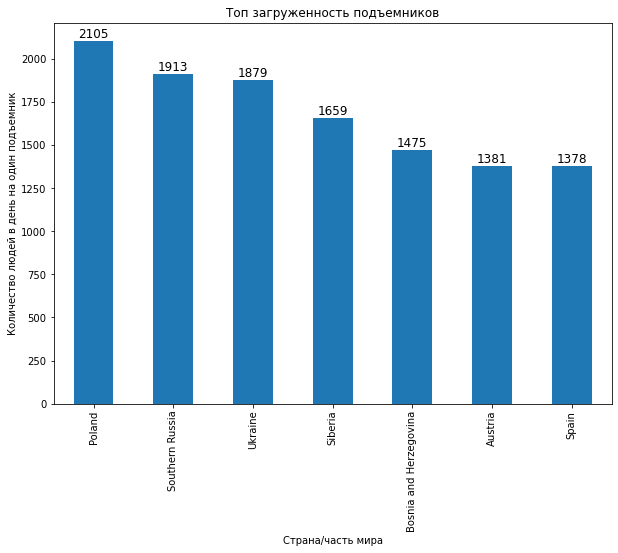

In [8]:
top_load['Patency'].plot(kind='bar',
                        title='Топ загруженность подъемников',
                        xlabel='Страна/часть мира',
                        ylabel='Количество людей в день на один подъемник')
for el, val in enumerate(top_load['Patency'].values):
    plt.text(el, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':12})

### Визуалиция №2
Есть сведения о горнолыжных курортах разных стран.
Здесь проверяю гипотезу - чем выше горы, тем больше сложных трасс.

#### Вывод
Мы видим, что действительно такая взаимосвязь имеется и чем выше горы, тем больше в них сложных трасс.
Но также мы видим, что после 3300-3400 метров количество сложных трасс резко уменьшается.

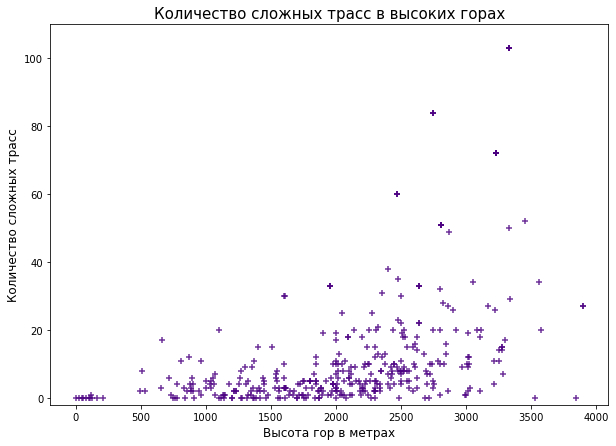

In [4]:
# Вариант seaborn
sns.regplot(data=df, x='HighestPoint', y='DifficultSlope', fit_reg=False, color='indigo', marker='+')
plt.title('Количество сложных трасс в высоких горах', fontdict={'size':15})
plt.xlabel('Высота гор в метрах', fontdict={'size':12})
plt.ylabel('Количество сложных трасс', fontdict={'size':12})
plt.ylim(-2, 110)
plt.show()

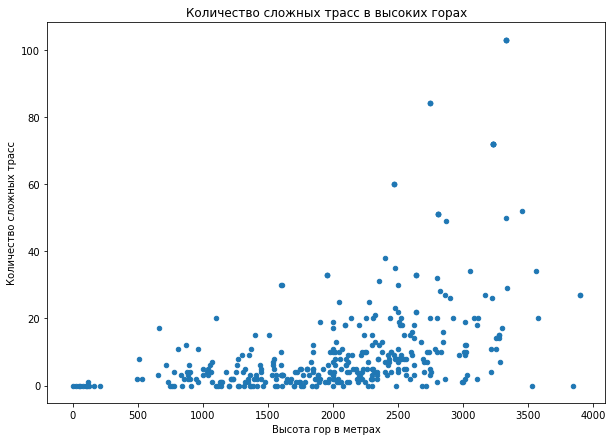

In [10]:
# Вариант pyplot
df.plot(kind='scatter',
       x='HighestPoint',
       y='DifficultSlope',
       title='Количество сложных трасс в высоких горах',
       xlabel='Высота гор в метрах',
       ylabel='Количество сложных трасс')
plt.show()

### Визуалиция №3
Есть сведения о горнолыжных курортах разных стран. По общему количетсву горнолоыжных трасс на курортах в зависимости от стран, подобрал топ-10 где большего всего зона катания, по среднему количеству трасс на страну.
Сделал соотношение по уровню сложности в процентном соотношении (процент не видно), но визуально различимо. Также добавил значения по среднему количеству трасс разной категории на график.

#### Вывод
В общем соотношении трасс друг к другу по сложности, мы видим, что в Сербии больше трасс для новичков чем других типов, а в Италии и Швейарии трасс для новичков меньше всего из рассматриваемых нами регионов. При этом, стоит обратить, что Франция в целом предлагает наибольшее количество легких трасс, чем любая другая страна.
По соотношению сложных трасс либируют Украина и Швейцария. По количеству сложных трасс лидирует Андора.
Средние трассы в наибольшем соотношении в Швейцрии, Италии и Австрии. Наибольшее количество средних трасс во Франции.

In [11]:
difficulty = df[['BeginnerSlope', 'IntermediateSlope', 'DifficultSlope', 'TotalSlope', 'Country']].groupby('Country').mean().sort_values('TotalSlope', ascending=False).head(10)

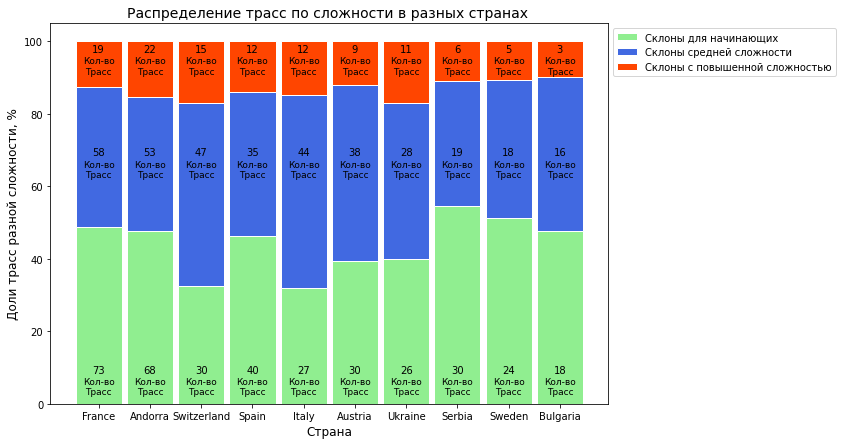

In [12]:
r = [0,1,2,3,4,5,6,7,8,9]
totals = [i+j+k for i,j,k in zip(difficulty['BeginnerSlope'], difficulty['IntermediateSlope'], difficulty['DifficultSlope'])]
BeginnerSlope = [i / j * 100 for i,j in zip(difficulty['BeginnerSlope'], totals)]
IntermediateSlope = [i / j * 100 for i,j in zip(difficulty['IntermediateSlope'], totals)]
DifficultSlope = [i / j * 100 for i,j in zip(difficulty['DifficultSlope'], totals)]
 
barWidth = 0.9
names = difficulty.index
plt.bar(r, BeginnerSlope, color='lightgreen', edgecolor='white', width=barWidth, label="Склоны для начинающих")
for el, val in enumerate(difficulty['BeginnerSlope'].values):
    plt.text(el, 8, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':10})
    plt.text(el, 2, 'Кол-во\nТрасс', horizontalalignment='center', verticalalignment='bottom', fontdict={'size':9})
    
plt.bar(r, IntermediateSlope, bottom=BeginnerSlope, color='royalblue', edgecolor='white', width=barWidth, label="Склоны средней сложности")
for el, val in enumerate(difficulty['IntermediateSlope'].values):
    plt.text(el, 68, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':10})
    plt.text(el, 62, 'Кол-во\nТрасс', horizontalalignment='center', verticalalignment='bottom', fontdict={'size':9})
    
plt.bar(r, DifficultSlope, bottom=[i+j for i,j in zip(BeginnerSlope, IntermediateSlope)], color='orangered', edgecolor='white', width=barWidth, label="Склоны с повышенной сложностью")
for el, val in enumerate(difficulty['DifficultSlope'].values):
    plt.text(el, 96.5, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':10})
    plt.text(el, 90.5, 'Кол-во\nТрасс', horizontalalignment='center', verticalalignment='bottom', fontdict={'size':9})

plt.title('Распределение трасс по сложности в разных странах ', fontdict={'size':14})
plt.xticks(r, names)
plt.xlabel("Страна", fontdict={'size':12})
plt.ylabel("Доли трасс разной сложности, %", fontdict={'size':12})
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

plt.show()

### Визуалиция №4
Есть сведения о горнолыжных курортах разных стран. Расчет стоимости ски-пассов в разнах странах.

#### Вывод
Мы видим медианные значения, квантили и выбросы по ценам, в соответствии с этим, можем представлять себе порядок цен на услуги в курортах разных стран.
Например мы видим, что средний уровень цен в Швейцарии наиболее высокий, чем в других странах.
В Швеции практически одинаковые цены на всех курортах, практически без рабросов, Но, есть 2 варианта выбросов.

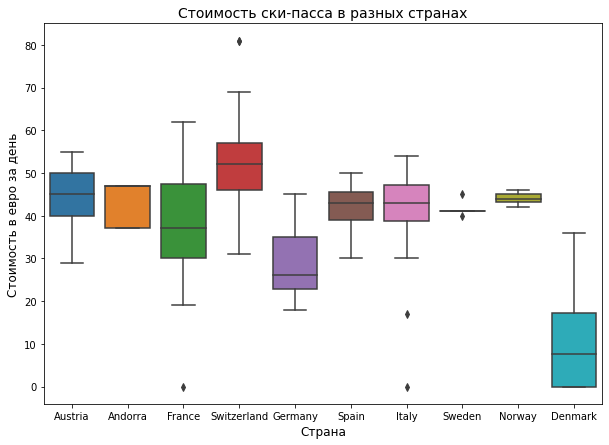

In [13]:
country = df['Country'].value_counts().sort_values(ascending=False).head(10).index.values
sns.boxplot(x='Country', y='DayPassPriceAdult', 
            data=df[df['Country'].isin(country)])
plt.title('Стоимость ски-пасса в разных странах', fontdict={'size':14})
plt.xlabel('Страна', fontdict={'size':12})
plt.ylabel('Стоимость в евро за день', fontdict={'size':12})

plt.show()

In [98]:
# Дополнительный вариант с простой визуализацией по самым дорогим ски-пассам в регионе.
pr = df[['DayPassPriceAdult', 'Country']].groupby('Country').max().sort_values('DayPassPriceAdult', ascending=False).reset_index()
pr.columns =['Страны', 'Максимальная стоимость ски-пасса']
pr.style.bar(align='mid')

,Страны,Максимальная стоимость ски-пасса
0,Switzerland,81
1,France,62
2,Austria,55
3,Italy,54
4,Spain,50
5,Andorra,47
6,Norway,46
7,Sweden,45
8,Germany,45
9,Finland,43
